NAME - JATAN SAHU

ID-202218061

LAB - 04

SUBJECT - DEEP LEARNING

#INSTRUCTIONS

## 1.Introduction
Working with images
This lab aims to demonstrate the efficacy of ANNs in image processing, alongside
regression analysis on the provided dataset. Additionally, it provides an
opportunity to gain expertise in implementing normalization techniques and
integrating skip connections within a deep learning model.

##2.Working with SKIP connections and regularization

Follow the given notebook for building the models with skip connection and
regularization.

##3.Dataset

1.MNIST:
The stepping stone or Hello world of Deep Learning this dataset contains
images of handwritten digits

2.CIFAR-10:
Contains colored images of various objects

3.Auto-mpg:
The data is technical spec of cars. In this regression dataset we need to
predict ‘mpg’ attribute from other column values.

##4.Tasks:
###4.1Classification
1.Load and visualize the images from the dataset.

2.Apply preprocessing and encoding to labels.

3.Define the ANN model for image classification. Include
normalization
and skip connections in our model.

4.Experiment with the different activation functions and loss functions while training the model

5.Analyze ANN model performance with different batch sizes (test of 3
different batch size) and learning rates (3 different learning rates)

6.Plot the accuracy for train and test data

7.You can use matplotlib plots to present your analysis for different hyper-
parameters

8.Evaluate the model’s performance using different performance matrices
discussed in the class

###4.2Regression
1.Load and preprocess the given data.

2.Build ANN model with regularization and skip connections and train
it on the given data.

3.Analyze ANN model performance with different batch sizes (test of 3
different batch size) and learning rates (3 different learning rates).

4.Plot mse, mae and rmse for different batch size and learning rates.

#Classification   TASK
# DATASET01 - CIFAR DATA

#1. Importing Libraries

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization, Add, Concatenate
from keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Flatten, Input, Concatenate
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#2.Importing dataset using Tensorflow

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


Learning rate - 0.001

#2. ML Training model PIPELINE

##2.1Splitting data

##2.2Preprocessing

##2.3Flattening data

##2.4Adding activation function

##2.5Normalisation

##2.6Skip Connectin

##2.7 Adding Optimizer,loss function, metrics

#3. Experiment with

##3.1Activation functions

##3.2Loss functions

##3.3Batch sizes

##3.4Learning rates

In [ ]:
# Load the CIFAR-10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Define a function to create and train the model
def create_and_train_model(activation_func, loss_func, batch_size, learning_rate):
    input_layer = Input(shape=(32, 32, 3))
    x = Flatten()(input_layer)
    x = Dense(128, activation=activation_func)(x)
    x = BatchNormalization()(x)

    skip_connection = x  # Save a copy of the output for the skip connection

    x = Dense(64, activation=activation_func)(x)
    x = BatchNormalization()(x)

    x = Dense(32, activation=activation_func)(x)
    x = BatchNormalization()(x)

    # Concatenate the output of the skip connection with the current output
    x = Concatenate()([x, skip_connection])

    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

    history = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded),
                        batch_size=batch_size, epochs=10, verbose=0)

    return history, model

# Experiment with different activation functions, loss functions, batch sizes, and learning rates
activation_functions = ['relu', 'tanh', 'sigmoid']
loss_functions = ['categorical_crossentropy', 'mean_squared_error']
batch_sizes = [32, 64, 128]
learning_rates = [0.001]

results = []

for activation_func in activation_functions:
    for loss_func in loss_functions:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                history, model = create_and_train_model(activation_func, loss_func, batch_size, learning_rate)
                accuracy = history.history['accuracy'][-1]
                val_accuracy = history.history['val_accuracy'][-1]
                results.append((activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model))

#4.Plots

##4.1Accuracy for train and test

#5.Evaluation

##5.1Classification Report

##5.2Confusion Matrix


In [ ]:
# Plot the accuracy for train and test data for each combination
for result in results:
    activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model = result
    label = f'{activation_func}_{loss_func}_{batch_size}_{learning_rate}'

    # Create a new figure and axes for each combination
    plt.figure()
    plt.plot(history.history['accuracy'], label=f'{label}_train', linestyle='-')
    plt.plot(history.history['val_accuracy'], label=f'{label}_test', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model with {activation_func} activation, {loss_func} loss, batch size {batch_size}, learning rate {learning_rate}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate the model's performance using different performance metrics
for result in results:
    activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model = result
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = y_test.squeeze()

    print(f'Model with {activation_func} activation, {loss_func} loss, batch size {batch_size}, learning rate {learning_rate}:')

    # Classification Report
    print(classification_report(y_true, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

#DATASET 02 -MNIST DATA

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

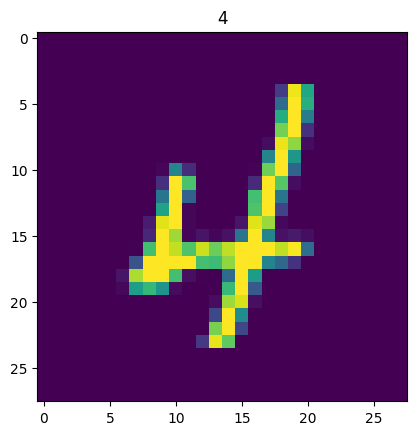

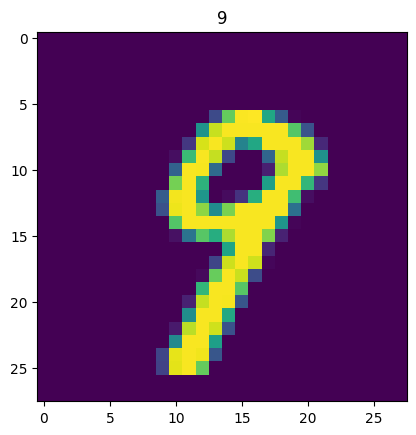

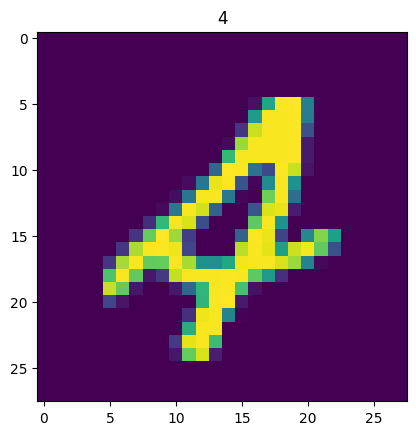

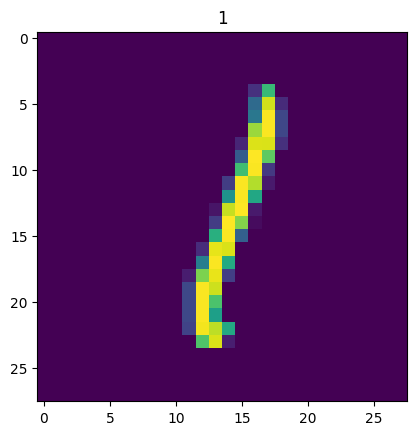

In [ ]:
# Plotting images
for index in np.random.randint(0,60000,4):
  plt.imshow(train_images[index,:,:])
  plt.title(train_labels[index])
  plt.show()

####2. Apply preprocessing and encoding to labels.

In [ ]:
# Encoding Labels: Convert integer labels to one-hot encoded vectors
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [ ]:
# Preprocessing: Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the image data
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

In [ ]:
train_labels_encoded.shape, test_labels_encoded.shape

((60000, 10), (10000, 10))

In [ ]:
train_images.shape, train_images.shape

((60000, 784), (60000, 784))

####3. Define the ANN model for image classification. Include normalization and skip connections in our model.

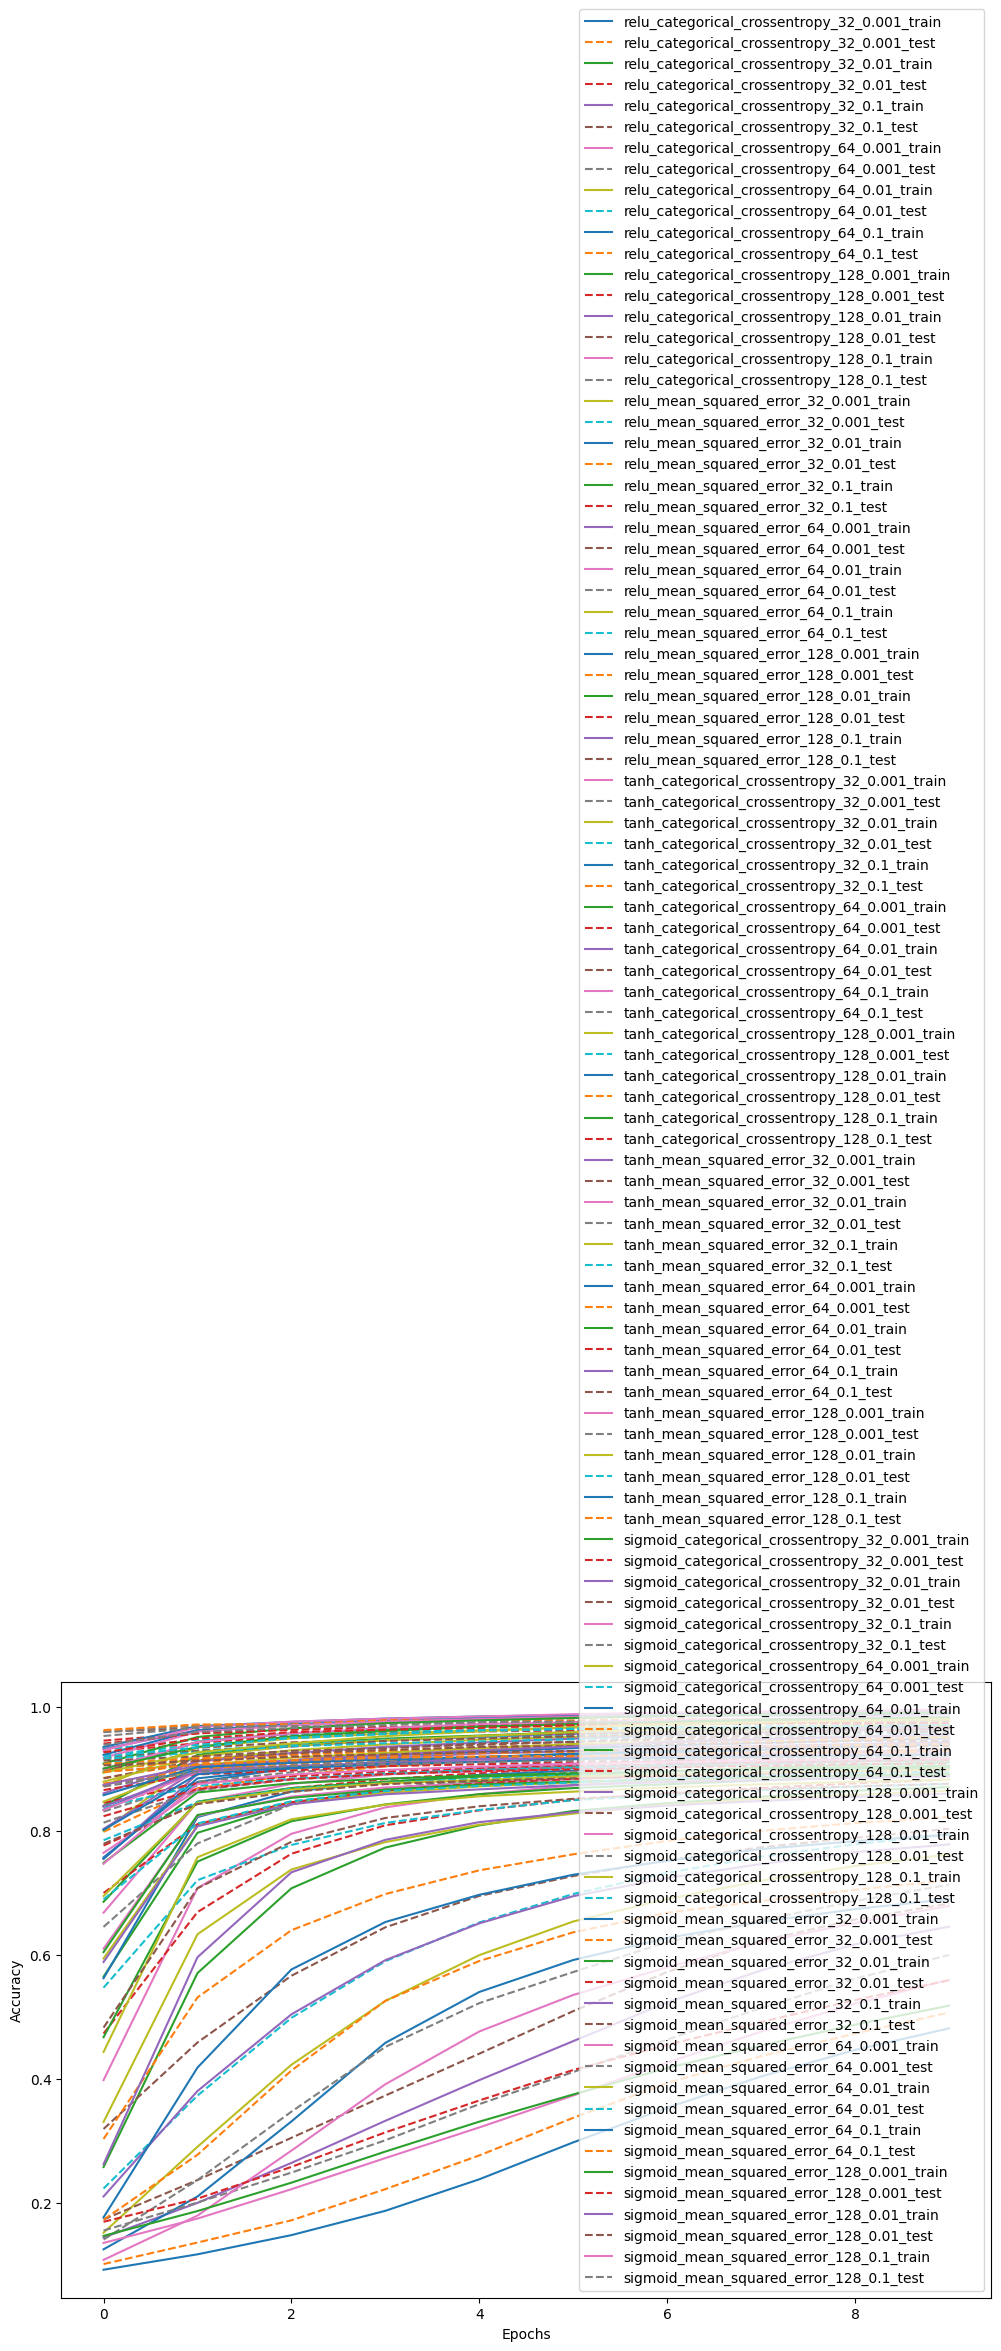

313/313 [==============================] - 1s 3ms/step
Model with relu activation, categorical_crossentropy loss, batch size 32, learning rate 0.001:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.94      0.94       892
           6       0.95      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix:
[[ 963    0    1    1    0    4    6    2    3    0]
 [   0 1114    2    

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Flatten, Input, Concatenate
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

# Define a function to create and train the model
def create_and_train_model(activation_func, loss_func, batch_size, learning_rate):
    input_layer = Input(shape=(28, 28))
    x = Flatten()(input_layer)
    x = Dense(128, activation=activation_func)(x)
    x = BatchNormalization()(x)

    skip_connection = x  # Save a copy of the output for the skip connection

    x = Dense(64, activation=activation_func)(x)
    x = BatchNormalization()(x)

    x = Dense(32, activation=activation_func)(x)
    x = BatchNormalization()(x)

    # Concatenate the output of the skip connection with the current output
    x = Concatenate()([x, skip_connection])

    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

    history = model.fit(train_images, train_labels_encoded, validation_data=(test_images, test_labels_encoded),
                        batch_size=batch_size, epochs=10, verbose=0)

    return history, model

# Experiment with different activation functions, loss functions, batch sizes, and learning rates
activation_functions = ['relu', 'tanh', 'sigmoid']
loss_functions = ['categorical_crossentropy', 'mean_squared_error']
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

results = []

for activation_func in activation_functions:
    for loss_func in loss_functions:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                history, model = create_and_train_model(activation_func, loss_func, batch_size, learning_rate)
                accuracy = history.history['accuracy'][-1]
                val_accuracy = history.history['val_accuracy'][-1]
                results.append((activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model))

# Plot the accuracy for train and test data for each combination
plt.figure(figsize=(12, 8))
for result in results:
    activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model = result
    label = f'{activation_func}_{loss_func}_{batch_size}_{learning_rate}'
    plt.plot(history.history['accuracy'], label=f'{label}_train', linestyle='-')
    plt.plot(history.history['val_accuracy'], label=f'{label}_test', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model's performance using different performance metrics
for result in results:
    activation_func, loss_func, batch_size, learning_rate, accuracy, val_accuracy, history, model = result
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(test_labels_encoded, axis=1)

    print(f'Model with {activation_func} activation, {loss_func} loss, batch size {batch_size}, learning rate {learning_rate}:')

    # Classification Report
    print(classification_report(y_true, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

#Regression
#DATASET03 - AUTO-MPG

1. Load and preprocess the given data.
2. Build ANN model with regularization and skip connections and train
it on the given data.
3. Analyze ANN model performance with different batch sizes (test of 3
different batch size) and learning rates (3 different learning rates).
4. Plot mse, mae and rmse for different batch size and learning rates.

###Loading and Preprocessing the data

In [ ]:
data = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data['car name'].nunique()

305

In [ ]:
data.shape

(398, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Convert 'horsepower' column to numeric
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# Impute missing values with the mean for each column
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Car name is of no use

In [ ]:
data = data.drop('car name', axis = 1)

In [ ]:
data.shape

(398, 8)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = data.drop(['mpg'], axis=1)
y = data['mpg']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Build an ANN Model with Regularization and Skip Connections:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_model():
    input_layer = layers.Input(shape=(X_train.shape[1],))

    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_layer)
    x = layers.BatchNormalization()(x)

    # Add a Dense layer to match input and intermediate layer dimensions
    identity = layers.Dense(64, activation='linear')(input_layer)

    # Create a skip connection by adding the input to the intermediate layer
    x = layers.Add()([x, identity])

    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    output_layer = layers.Dense(1)(x)  # Output layer for regression

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    return model

model = create_model()

In [ ]:
model

###Train the ANN Model with Different Batch Sizes and Learning Rates:


In [ ]:
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function to train and evaluate the model with different parameters
def train_and_evaluate(batch_size, learning_rate):
    model = create_model()  # Create a new model for each iteration
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mse, mae, rmse

# Define lists to store results for different batch sizes and learning rates
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
results = []

# Iterate through different batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        mse, mae, rmse = train_and_evaluate(batch_size, learning_rate)
        results.append((batch_size, learning_rate, mse, mae, rmse))

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results, columns=['Batch Size', 'Learning Rate', 'MSE', 'MAE', 'RMSE'])

3/3 [==============================] - 0s 6ms/step


3/3 [==============================] - 0s 8ms/step


3/3 [==============================] - 0s 4ms/step


###Plot MSE, MAE, and RMSE for Different Batch Sizes and Learning Rates:


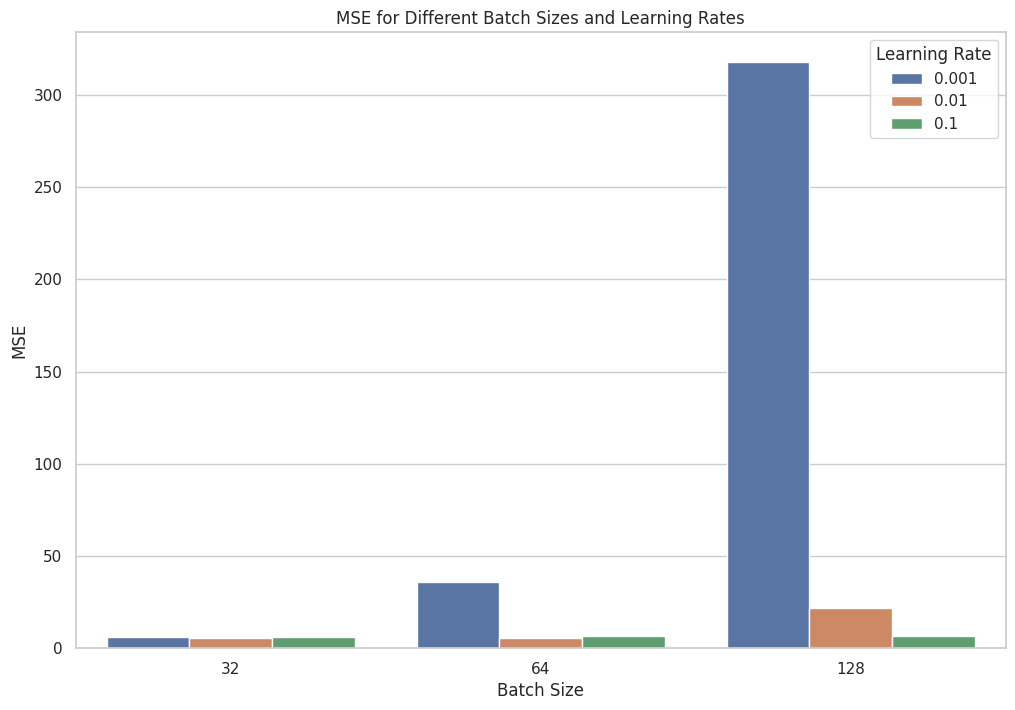

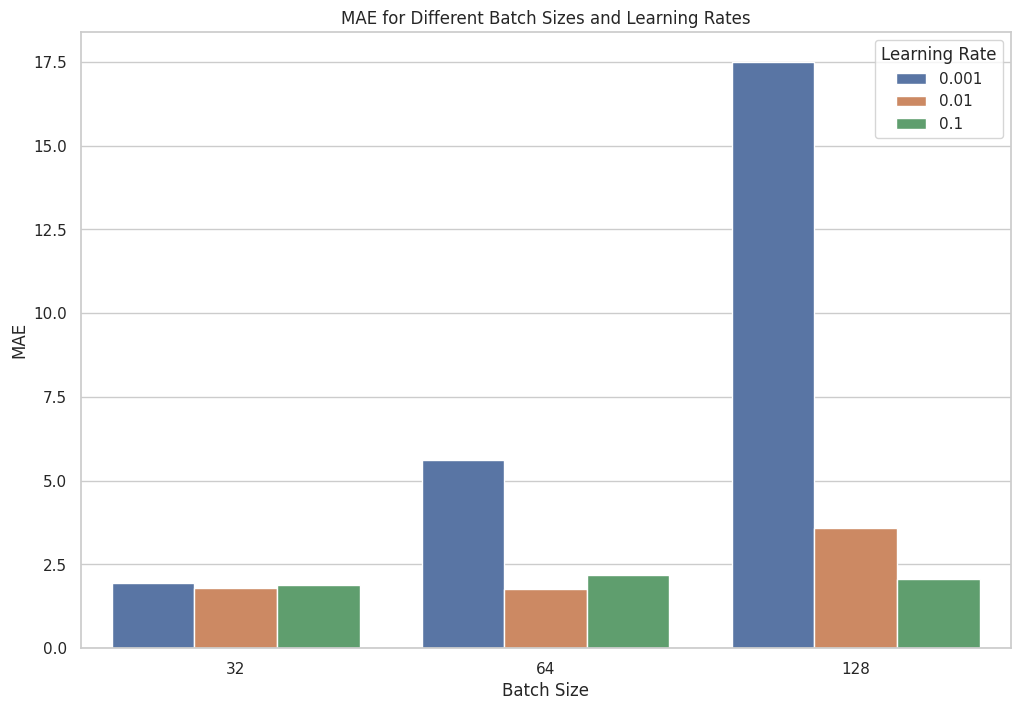

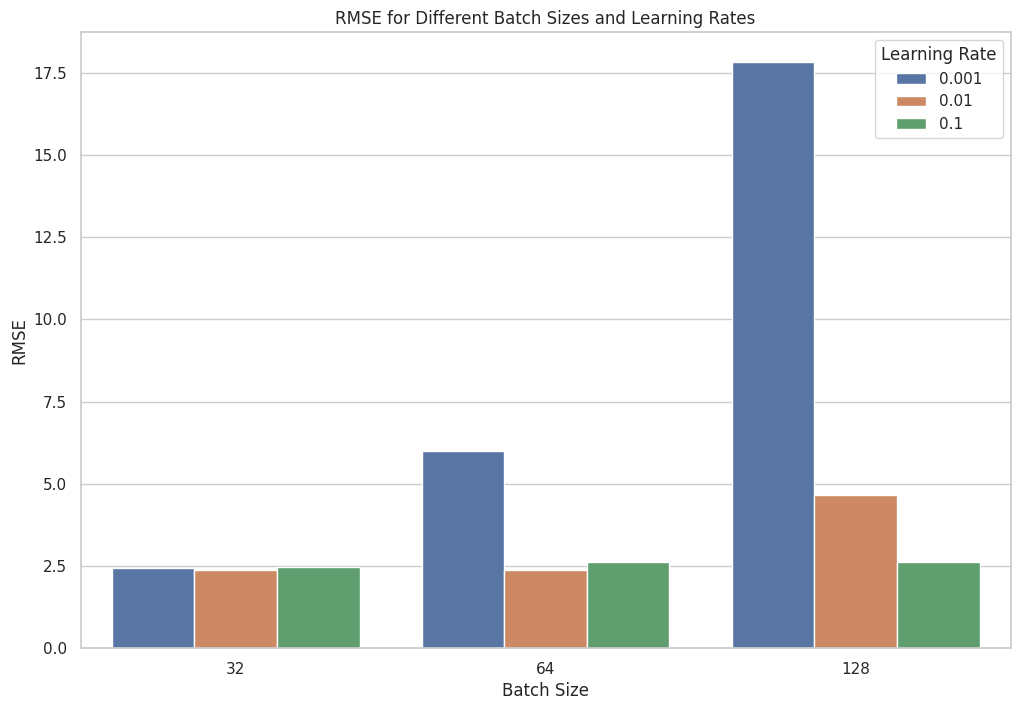

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot MSE, MAE, and RMSE for different batch sizes and learning rates
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x="Batch Size", y="MSE", hue="Learning Rate", data=results_df)
plt.title("MSE for Different Batch Sizes and Learning Rates")
plt.show()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x="Batch Size", y="MAE", hue="Learning Rate", data=results_df)
plt.title("MAE for Different Batch Sizes and Learning Rates")
plt.show()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x="Batch Size", y="RMSE", hue="Learning Rate", data=results_df)
plt.title("RMSE for Different Batch Sizes and Learning Rates")
plt.show()